In [11]:
from datetime import datetime
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [3]:
date = datetime(2018, 11, 8, 12)
station = 'REV'
df = WyomingUpperAir.request_data(date, station)
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])

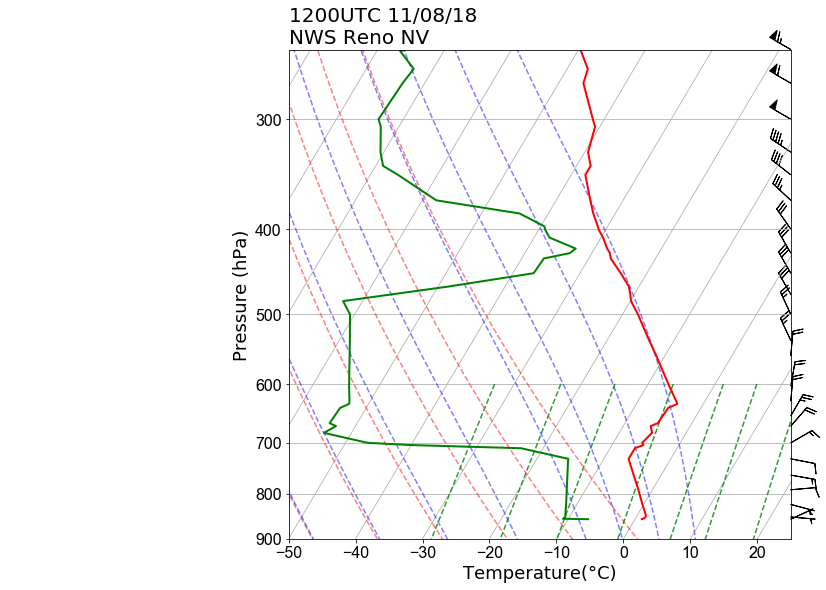

In [24]:
plt.rcParams['figure.figsize'] = (9, 9)
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r', linewidth = 2)
skew.plot(p, Td, 'g', linewidth = 2)
# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(250, 1000, 25) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(p, my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(900, 250)
skew.ax.set_xlim(-50, 25)

skew.ax.set_ylabel('Pressure (hPa)', fontsize = 18)
skew.ax.set_xlabel('Temperature(°C)', fontsize = 18)
skew.ax.set_title('1200UTC 11/08/18\nNWS Reno NV', fontsize = 20, loc = 'left')
for label in (skew.ax.get_xticklabels() + skew.ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(16);
    
plt.savefig('REV_12z_110818.png', dpi=300)